**IANNwTF - Homework 02**

Multi-Layer Perceptron

*2.1 - Building your data set*

In [215]:
import numpy as np
import matplotlib.pyplot as plt

In [216]:
## Task 01 - Building your data set

# input numbers
# 100 random numbers btw 0 and 1
x = np.random.rand(100)

# targets
# t[i] = x[i]**3-x[i]**2
t = np.zeros(100)
for idx, i in np.ndenumerate(x):
    t[idx] = (i**2)-(i**3)

# putting it in one array
data = np.stack([x, t], axis=1)

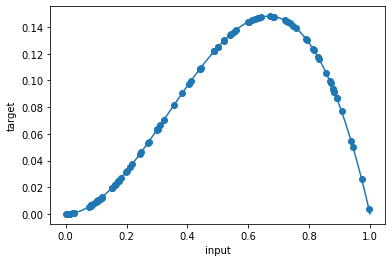

In [217]:
# plot datapoints along with underlying function
plt.scatter(x, t)
plt.xlabel('input')
plt.ylabel('target')

x1 = np.linspace(0, 1, 100)
y = np.random.rand(100)
for idx, i in np.ndenumerate(x1):
    y[idx] = (i**2)-(i**3)
plt.plot(x1, y)
plt.show()


*2.2 Perceptrons*

In [218]:
# relu activation function
def relu(x):
  x[x<0] = 0
  return x
# derivative of relu function
def relu_derivative(x):
  x[x>=0] = 1
  x[x<0] = 0 
  return x
# mean squared error function
def mse(y, t):
  return 1/2 * ((y - t)**2)

In [219]:
## Task 02 - Perceptrons

# one perceptron layer
class Layer(object):
  # accept number of units of this and preceding layer
  def __init__(self, n_units, input_units):
    self.bias = np.zeros(n_units)
    self.weights = np.random.rand(input_units, n_units)
    self.input = None
    self.preactivation = None
    self.activation = None

  # forward method for activation
  # returns each unit's activation (output)
  def forward_step(self, input):
    self.input = input
    self.preactivation = input @ self.weights + self.bias
    self.activation = relu(self.preactivation)
    return self.activation

  # backwards method for backpropagation
  # updates each unit's parameters
  # parameter dLda: 
  # loss-activation derivative obtained from layer l+1 
  # or directly from loss function derivative
  def backward_step(self, dLda, lr):
    # compute gradients wrt layer's parameters
    error_signal = relu_derivative(self.preactivation) * dLda # bias gradients
    weights_grad = (np.transpose(self.input) @ error_signal)

    # compute gradients wrt its input (activation of l-1) 
    # -> new dLda for next layer
    input_grad = error_signal @ np.transpose(self.weights)

    # update parameters
    self.weights = self.weights - (lr * weights_grad)
    self.bias = self.bias - (lr * error_signal)

    # pass the new updated dLda
    return input_grad

In [220]:
## Task 03 - Multi-Layer Perceptron

# whole multi-layer perceptron
class MLP(object):
  # initialized with learning rate and a list of number of layers
  # and their respective unit size
  def __init__(self, lr, layers):
    self.lr = lr
    self.layers = []
    # initializes all the layers with the designated number of units
    n_input = 1
    for n_units in layers:
       self.layers.append(Layer(n_units, n_input))
       n_input = n_units

  # propagates input signal (from given one data point) forward 
  # through the list by updating the input for the next layer
  # returns output of the layer (if last layer: prediction)
  def forward_step(self, data_point):
    layer_input = np.array([data_point[0]]).reshape(1,1)
    for layer in self.layers:
      layer_input = layer.forward_step(layer_input)
    return layer_input

  def backpropagation(self, data_point, prediction):
    delta = prediction - data_point[1] # derivative for mse loss function
    for layer in reversed(self.layers):
      delta = layer.backward_step(delta, self.lr)

In [221]:
## Task 04 - Training

# MLP with 1 hidden layer (10 units) & output layer (1 unit)
nn = MLP(lr=0.05, layers=[10, 1])

losses = [] # saves average loss of epoches
num_epochs = 20
for epoch in range(num_epochs):
  print('Epoch {0}/{1}:'.format(epoch, num_epochs))
  epoch_losses = [] # saves losses of each data point prediction
  # perform forward and backward steps for each data point
  for data_point in data: 
    prediction = nn.forward_step(data_point)
    epoch_losses.append(mse(prediction, data_point[1])) # compute mse
    nn.backpropagation(data_point, prediction)
  avg_loss = np.mean(epoch_losses) 
  losses.append(avg_loss)
  print('Average Loss: %.6f'%(avg_loss))
print("Training finished.")

Epoch 0/20:
Average Loss: 0.024681
Epoch 1/20:
Average Loss: 0.004889
Epoch 2/20:
Average Loss: 0.003878
Epoch 3/20:
Average Loss: 0.002807
Epoch 4/20:
Average Loss: 0.001708
Epoch 5/20:
Average Loss: 0.000972
Epoch 6/20:
Average Loss: 0.000807
Epoch 7/20:
Average Loss: 0.000793
Epoch 8/20:
Average Loss: 0.000792
Epoch 9/20:
Average Loss: 0.000792
Epoch 10/20:
Average Loss: 0.000792
Epoch 11/20:
Average Loss: 0.000792
Epoch 12/20:
Average Loss: 0.000792
Epoch 13/20:
Average Loss: 0.000792
Epoch 14/20:
Average Loss: 0.000792
Epoch 15/20:
Average Loss: 0.000791
Epoch 16/20:
Average Loss: 0.000791
Epoch 17/20:
Average Loss: 0.000791
Epoch 18/20:
Average Loss: 0.000791
Epoch 19/20:
Average Loss: 0.000791
Training finished.


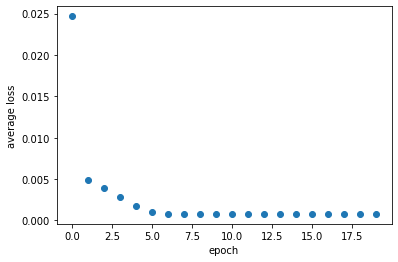

In [222]:
## Task 05 - Visualization

# plot training progress (aka average epoch losses)
plt.scatter(np.arange(num_epochs), losses)
plt.xlabel('epoch')
plt.ylabel('average loss')

plt.show()